## Cloning Quasar

Let's look at the redshift distributions of the quasars in the Sloan Digital Sky Survey.

The Sloan Digital Sky Survey or SDSS is a major multi-spectral imaging and spectroscopic redshift survey using a dedicated 2.5-m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States. Operations started in 1998.

In phase 1, SDSS has released photometry data 357 million (!!!) unique sources and 1.6 million spectra. In phase 2, SDSS observed the same patch of the sky many times ("time domain astronomy", and now we're going to have LSST!) 

- Download the SDSS quasar data
- Upsample this distribution in two ways (but al least one of them), using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distributions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)
- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data. Does that agree with your expectation?
(Hint: It shouldn't. But why?)

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.optimize import brentq
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
import scipy.interpolate

import astroML
from astroML.datasets import fetch_dr7_quasar

In [ ]:
# Download the data

# Fetch the quasar data
data = fetch_dr7_quasar()

# Select the first 10000 points
data = data[:10000]

z = data['redshift']

In [ ]:
# General variables
N = 10000 # Number of sampling
h, edges = np.histogram(z, bins=100, density=True) # Original distribution histogram
bin_centers = (edges[:-1] + edges[1:]) / 2  # Compute bin centers

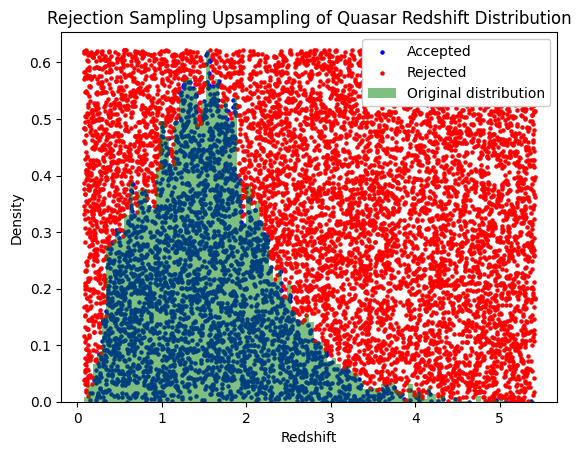

In [ ]:
# Upsampling with rejection sampling method

# Generate random points under a uniform distribution
x = np.random.uniform(min(z), max(z), N)
y = np.random.uniform(min(h), max(h), N)

i = np.digitize(x, edges) - 1 # Number of the bin corresponding to each x value generated

# Rejection sampling
valid_x = x[y <= h[i]]
valid_y = y[y <= h[i]]

# Plot
plt.scatter(valid_x, valid_y, c='blue', label="Accepted", s=5)
plt.scatter(x[y > h[i]], y[y > h[i]], c='red', label="Rejected", s=5)
plt.hist(z, bins=100, color='green', alpha=0.5, density=True, label="Original distribution")
plt.xlabel("Redshift")
plt.ylabel("Density")
plt.legend(loc='upper right', framealpha=1.0)
plt.title("Rejection Sampling Upsampling")
plt.show()

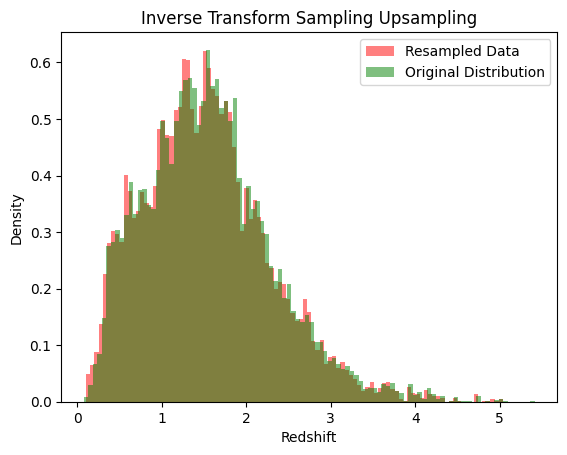

In [112]:
# Upsampling with inverse transform sampling method

# Compute the cdf
cdf = np.cumsum(h) / np.sum(h)

# Compute the inverse cdf
inverse_cdf = scipy.interpolate.interp1d(cdf, bin_centers, bounds_error=False, fill_value=(bin_centers[0], bin_centers[-1]))

# Generate random values from a uniform distribution
eps = np.random.uniform(0, 1, N)
# Sample the inverse cdf in eps
samples = inverse_cdf(eps)

# Plot
plt.hist(samples, bins=100, color="red", alpha=0.5, density=True, label="Resampled Data")
plt.hist(z, bins=100, color="green", alpha=0.5, density=True, label="Original Distribution")
plt.xlabel("Redshift")
plt.ylabel("Density")
plt.legend()
plt.title("Inverse Transform Sampling Upsampling")
plt.show()

In [ ]:
# Capire qual è la distribuzione attesa delle quasar 